# Machine Learning and Statistics Project, November 2019
***

## **Author:** Francis Adepoju
***
## __Project Scope:__ 
1. Using Descriptive Statistics and Plots to Describe the Boston House Prices Dataset, 
2. Using Inferential Statistics to Analyse if there is any Significant Difference in Median House Prices between Houses that are along the Charles River and those that are not. 
3. Using Keras to create a Neural Network that can Predict the Median House Price based on other variables in the Dataset.

***


## Summary of the dataset:
#### The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:
1. __crim__   - per capita crime rate by town.
2. __zn__     - proportion of residential land zoned for lots over 25,000 sq.ft.
3. __indus__  - proportion of non-retail business acres per town.
4. __chas__   - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. __nox__    - nitrogen oxides concentration (parts per 10 million).
6. __rm__     - average number of rooms per dwelling.
7. __age__    - proportion of owner-occupied units built prior to 1940.
8. __dis__    - weighted mean of distances to five Boston employment centres.
9. __rad__    - index of accessibility to radial highways.
10. __tax__    - full-value property-tax rate per **`$10,000`**.
11. __ptratio__  - pupil-teacher ratio by town.
12. __black__  - `1000 * (Bk - 0.63)^2` where Bk is the proportion of blacks by town.
13. __lstat__  - lower status of the population (percent).
14. __medv__  - median value of owner-occupied homes in **`$1,000`**.

#### NOTE: 
1. The __medv__ variable is the target (y) variable. The prices of the house indicated by the __medv__ variable is therefore our target variable and the remaining 13 are the feature variables. The effect of the these 13 variables on house prices are to be investigated and predicted.
2. In this project, we use the Python[1], Scipy[2], Tensorflow, Keras[3], and Jupyter[4] packages to produce a comprehensive description, inference and prediction of house prices using the Boston house prices' dataset [5] 

***
## 1. Description
***

#### Import necessary Libraries

In [72]:
# Library for generating random variables.
import numpy as np

# Library for handling data.
import pandas as pd

# random number gen
from random import sample
from numpy.random import randn

# Library for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Library for t-tests and ANOVA.
# And for Machine Learning
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.linalg as sl
import sklearn.linear_model as lm

# For Machine Learning.
import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Error Library
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For whitening.
import sklearn.decomposition as dec

In [73]:
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### 1.1 Load Dataset from my gitHub repository and gain some insight about the dataset

In [74]:
# Let's use pandas to read this csv file and organise the housing data.
# Load the boston-housing dataset... This is the URL from "raw" version of housing.csv file from my github
#df = pd.read_csv("housingCSV2.csv")
df = pd.read_csv("https://raw.githubusercontent.com/dewaledr/MLearning-Projects/master/housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [75]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


#### To get some basic statistics about our data like mean, median, count etc. we use __.describe()__ method:

In [76]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [77]:
# Investigate the data for missing or non values...
print("Number of rows in this dataset :", len(df.index))
print("====================================")
df.info()

Number of rows in this dataset : 506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1.2 Data Backup and Clean up...

In [78]:
# Make a copy of the dataset for Stage 2 - Description & Inference
df2 = df.copy(deep=True)

# Another copy for Stage 3 - Prediction
df3 = df.copy(deep=True)

In [79]:
# df2.head()

* Generally, NaN or missing values can be in any form like 0, ?, or may be written as “missing” 
* As observed in our dataset above __(chas and zn)__, there are a lot of  0’s, 
* Therefore we can replace them with NaN to calculate how much data we are missing [6].

In [80]:
#print(df2.head())
df2.zn.replace(0, np.nan, inplace=True)
df2.chas.replace(0, np.nan, inplace=True)

#### 1.2.2 Calculate the percentageof features with missing values
* Generally, if there is 20-25% missing values we can impute them with different ways like mean, median or an educated guess by us. 
* But if it’s more than that, it’s better to remove those features otherwise they can affect our result. 
* As we can see below both “zn” and “chas” missing more than 70% data so we will remove both these 2 features.

In [81]:
df2.isnull().sum()/len(df2)*100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

In [82]:
# Drop these two features from df2
df2 = df2.drop("zn", 1)
df2 = df2.drop("chas", 1)

In [83]:
df2.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1.3 Multi-Linear Regression on the dataset [using Statsmodel]

In [84]:
# Let's attempt to do linear regression on these remaining variables.
x = df2[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 
          'ptratio', 'black', 'lstat']]

In [85]:
# House prices.
y = df2['medv']
#y.head()

In [86]:
# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)

# Fit the data.
rsm = msm.fit()

# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          1.87e-132
Time:                        11:49:39   Log-Likelihood:                -1509.6
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3083      5.200      7.175      0.0

/Users/francisadepoju/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 1.3.1 REMARKS:
The condition number is large, 15,100. This might indicate that there are strong multicollinearity or other numerical problems... Need to investigate this!
In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others [7].

***
### 1.3 Multi-linear regression on the dataset [using SKLearn] [8] 

In [87]:
# Create a linear regression model instance.
m = lm.LinearRegression()

### 1.3.2: Assumed Linear Model Equation
Assuming that the following Linear Relationship exists between the remaining features and the output (house prices):
***

$$ medv = int+ a (crim) + b (indus)  + c (nox) + d (rm) + e (age) + 
          f (dis) + g (rad) + h (tax) + i (ptratio) + j (black) + k (lstat) $$
int = intercept
***

In [88]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# Here's our intercept.
m.intercept_

37.30833678353185

In [90]:
# Here's our coefficients, in order.
m.coef_

array([-1.03402051e-01,  1.82116406e-02, -1.78291762e+01,  4.07437888e+00,
       -2.64677545e-03, -1.21018231e+00,  3.04603188e-01, -1.09013226e-02,
       -1.13114598e+00,  9.85349521e-03, -5.25072184e-01])

In [91]:
# See how good our fit is.
m.score(x, y)

0.7293219233110855

### 1.3.2 REMARKS:
- These results agree largely with those from statsmodel. 
- Therefore, we can use statsmodel or sklearn for the descriptive analysis.
- Statsmodel involves calling fewer command to achieve the same outputs as sklearn
- Statsmodels fared quite well with Panda's __data frames__ while sklearn models work with __arrays (ndarray)__.

### 1.3.3 Histogram:
Now let’s plot the histogram of all the available features to see the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c49813890>,
      dtype=object)

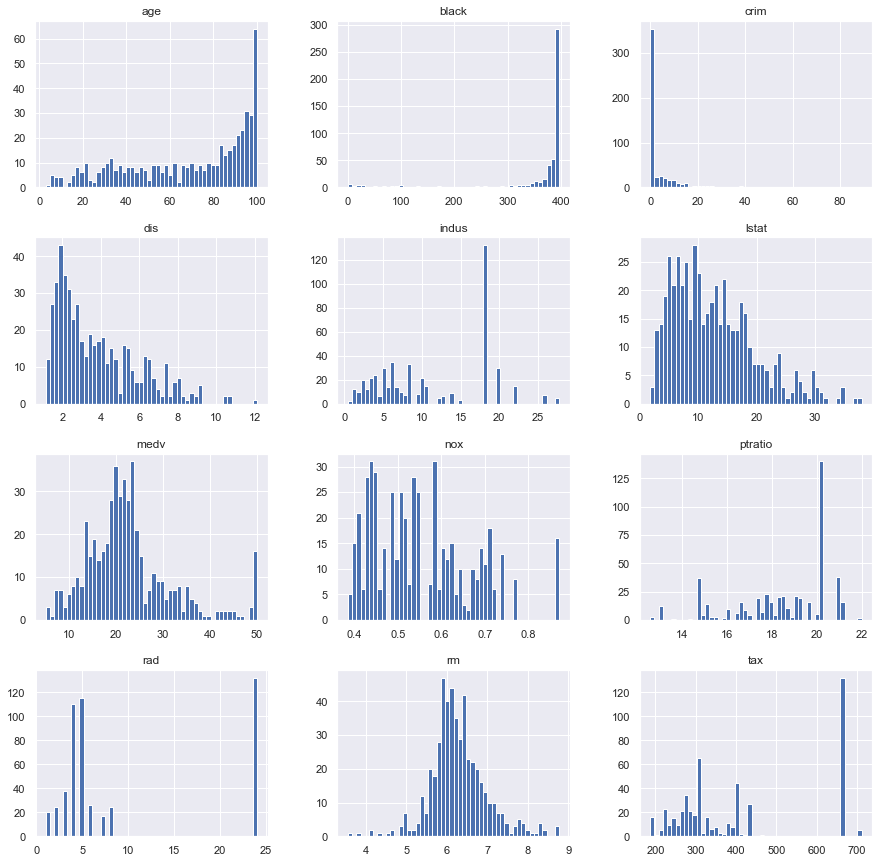

In [92]:
df2.hist(bins=50, figsize=(15, 15))

### 1.3.4 Correlation:
Now let’s check the correlation between all the feature variable and target variable by plotting the heatmap as shown below:

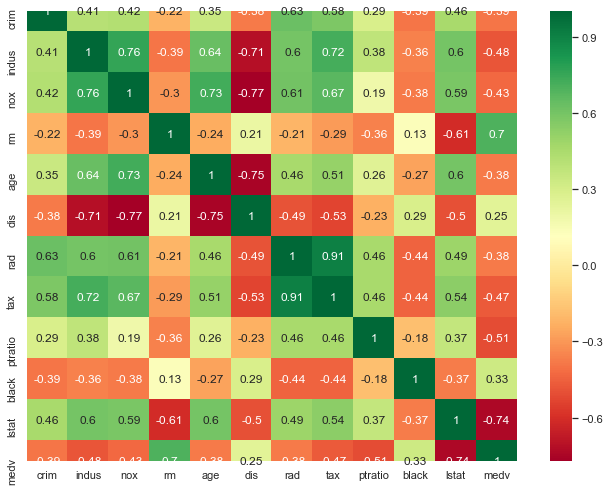

In [93]:
# plt.rcParams['figure.figsize'] = (20.0, 10.0)
# Just for compactness, reduce the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df2.corr().round(2), square=True, cmap='RdYlGn', annot=True)

### Observation from Heat Map:
- From the above correlation plot, we can see that __medv__ is strongly correlated to __lstat, rm__
- __rad & tax__ are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. 
- Similar to the features __dis & age__ which have a correlation of -0.75. So we will exclude these four features from our features list.


### NOTE:
- From Heat map above, we know that it will be neat to exclude the following features, in addition to the earlier ones from the regression equation:
__(zn, chas, rad, tax, dis, age)__
- As Scikit learn wants “features” and “target” variables in X and Y respectively. 
- Here __medv__ is our target variable, we can extract features and target arrays from our dataset as shown below. 
- From X we drop the medv column along with other features and in y we keep only __medv__ column:

In [94]:
xdrop = df2.drop(["medv","rad","tax","dis","age"], 1).values
y3 = df2["medv"].values

In [95]:
# Let's re-do linear regression on these variables.
x3 = df2[['crim', 'indus', 'nox', 'rm', 'ptratio', 'black', 'lstat']]

In [96]:
# # Tell statmodels to include an intercept.
xwithc = sm.add_constant(x3)

# Create a model.
msm = sm.OLS(y3, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     158.2
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          3.22e-122
Time:                        11:49:42   Log-Likelihood:                -1544.1
No. Observations:                 506   AIC:                             3104.
Df Residuals:                     498   BIC:                             3138.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8620      4.548      2.828      0.0

/Users/francisadepoju/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 1.3.4 REMARKS:
- The condition number is is still large __(7760)__ but better than earlier __(15,100)__. 
- This might indicate that there are still strong multicollinearity or other numerical problems... Need to investigate this further!

***
## Turning to Statistics:
1. Features with high coefficients should be included in the regression
2. For multi-linear regression, adjusted R-squared is one of the most common measures of goodness of fit. In other words it is a universal measure to evaluate how well linear regressions fair and compare [7]. It is a much more appropriate measure for a multiple linear regression because it steps on the R-squared and adjusts for the number of variables included in the model. If we are using features with little or no explanatory power. The R squared would increase nonetheless.
3. As observed, adjusted R-squared is still much lower than the R-squared this indicates that one or more of the predictors have little or no explanatory power, so more investigation is needed.
4. Turning to the Summary report from the statsmodel, we were given the p values of the features which we later use to determine whether the independent variables were relevant for the model. If a variable has a __p value above 0.05__ we can disregard it. Thus __(crim, indus and nox)__ should be dropped.
***

In [97]:
# Let's re-do linear regression on these remaining variables.
x4 = df2[[ 'rm', 'ptratio', 'black', 'lstat']]
y4 = df2["medv"].values

In [98]:
# # Tell statmodels to include an intercept.
xwithc = sm.add_constant(x4)

# Create a model.
msm = sm.OLS(y4, xwithc)
# Fit the data.
rsm = msm.fit()

# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.9
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          4.10e-125
Time:                        11:49:42   Log-Likelihood:                -1545.8
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0548      4.220      2.857      0.0

***
### 1.4 Summary Observation:
1. The condition number is is still large __(6,810)__ but better than earlier __(7,760)__. This indicates that there are still strong multicollinearity or other numerical problems.
2. Adjusted R-squared is still lower than the R-squared but better than previous prediction. This indicates that one or more of the predictors __still have little or no explanatory power__.
3. There are no more features with p value > 0.05
***

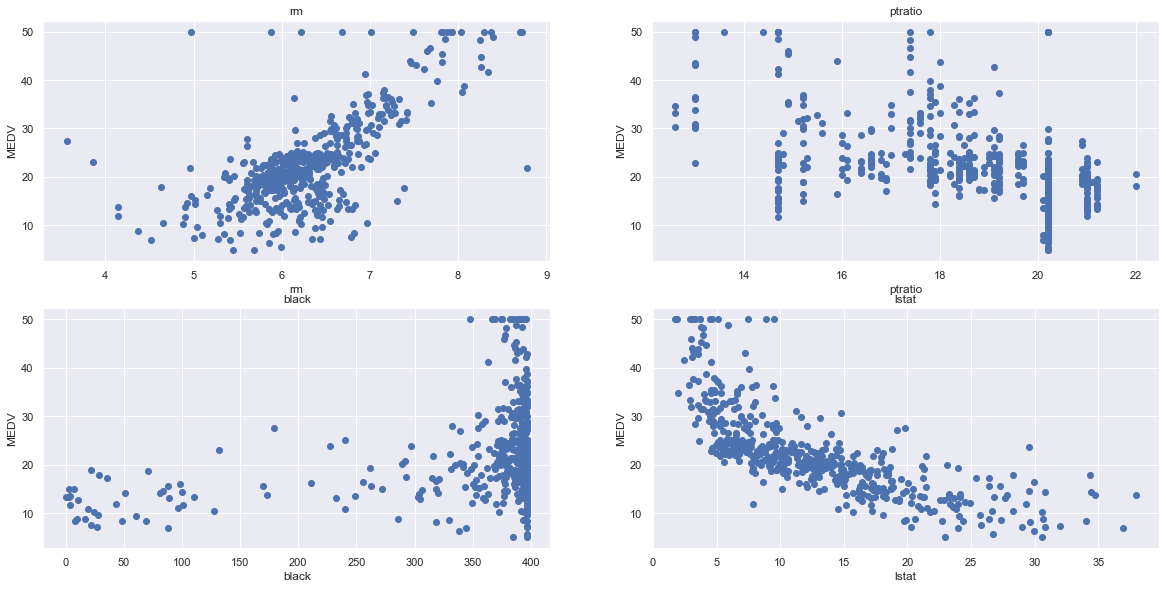

In [99]:
# Plot the relationships between remaining features and the medv
plt.figure(figsize=(20, 15))

#features = ['crim','indus','nox','rm','ptratio','black','lstat']
features = ['rm','ptratio','black','lstat']
target = df2['medv']
for i,col in enumerate(features):
    plt.subplot(3, len(features)/2 , i+1)
    x3 = df2[col]
    y3 = target
    plt.scatter(x3, y3, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


- From the above visualization, we can conclude that **medv** and **rm** are linearly correlated 
- __(medv)__ increase with an increase in __(rm)__ which is number of rooms and looks like both are following a linear relationship. 
- Also when population of lower status percentage __(lstat)__ increases,house price __(medv)__ or price decreases.

***
## 2. Inference
***

Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population. Inferential statistics are valuable when examination of each member of an entire population is not convenient or possible.
Inferential statistics use statistical models to help compare the sample data to other samples or to previous research [9].
Most research uses statistical models called the Generalized Linear model and include Student’s t-tests, ANOVA (Analysis of Variance), regression analysis and various other models that result in straight-line (“linear”) probabilities and results. The main indexes for inferential statistics articles are:
* Binomial Theorem
* Hypothesis Testing
* Normal Distributions
* T-Distributions
* Central Limit Theorem
* Confidence Intervals
* Regression Analysis / Linear Regression
* Comparison of Means.


In [100]:
# Let's make a copy of the dataset and then separate the chars column to show houses that are 
# along the Charles river (chas = 1) and those that are not (chas = 0);

In [101]:
df3_0 = df[df3['chas'] == 0]
df3_1 = df[df3['chas'] == 1]
n_0 = df3_0['chas'].count()
n_1 = df3_1['chas'].count()

In [102]:
print("Non-boundary Houses: ", n_0)
print("Boundary Houses    : ", n_1)
print("Total no. Houses   : ", n_0 + n_1)


Non-boundary Houses:  471
Boundary Houses    :  35
Total no. Houses   :  506


### NOTE:
- Above count shows there are **35** houses bounds the Charles river while **471** houses do not.
- To make a reasonable inference with t-test or Anova, a random sample of 30 houses are selected from each group as follows:

In [103]:
# create random index of 30 out of the lot

#np.random.seed(101)  #Seeding not working here? 
rindex_0 =  np.array(sample(range(len(df3_0)), 30))
rindex_1 =  np.array(sample(range(len(df3_1)), 30))
# print(rindex_0)
# print(rindex_1)

# get 30 random rows from each of the dataframes and then print them out (using iloc for positional indexing)
dfr_0 = df3_0.iloc[rindex_0]
dfr_1 = df3_1.iloc[rindex_1]
# print(dfr_0)
# print(dfr_1)

# Count the samples.
nA = dfr_0['chas'].count()
nB = dfr_1['chas'].count()
print(f'Non-Boundary houses = {nA}')
print(f'Boundary houses     = {nB}')

# Calculate the means.
mA = dfr_0['medv'].sum() / nA
mB = dfr_1['medv'].sum() / nB

# Print to 2 decimal places
print(f"mean of medv for Non-Bounded houses   = {mA:.2f}")
print(f"mean of medv for Bounded houses = {mB:.2f}")

Non-Boundary houses = 30
Boundary houses     = 30
mean of medv for Non-Bounded houses   = 20.89
mean of medv for Bounded houses = 29.20


In [104]:
# Set parameters for two populations.
popA = {'m': mA, 's': 0.50}
popB = {'m': mB, 's': 0.50}

# # Create two samples, one from each population.
# # Create two samples, one from each population.

sampA = np.random.normal(popA['m'], popA['s'], 30)
sampB = np.random.normal(popB['m'], popB['s'], 30)

print(sampA)
print(sampB)

[20.95271566 19.76444755 20.5031129  20.33502969 21.21413273 20.07637787
 21.00934159 21.49358448 19.79497035 21.23034715 20.74174916 21.75596601
 21.38405331 21.07000239 21.45792478 20.46054463 19.96556738 21.52541807
 21.18019587 20.95260335 20.33386663 21.26125809 21.15676155 20.94523133
 21.0596402  21.25265587 20.99545444 20.8919555  20.1782583  20.3500864 ]
[29.56333356 29.38794463 29.39951271 28.63131074 28.21486248 29.38348948
 28.80408116 29.43906657 28.89337443 29.79908476 28.44468646 29.28754104
 29.46271009 29.60753873 30.09753884 29.11153051 29.31366057 29.58243057
 29.19109204 28.84642508 29.56548111 29.09563802 28.97156709 29.81772374
 28.35383553 29.11277039 29.13726601 29.86749958 29.91843184 29.25977626]


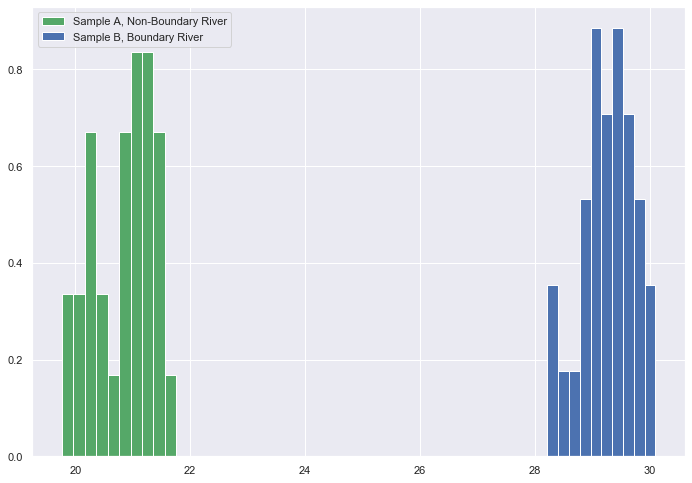


***********************************************
mean of medv for Non-Bounded houses  = 20.89
mean of medv for Bounded houses      = 29.20
***********************************************


In [105]:
# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', label="Sample A, Non-Boundary River")
plt.hist(sampB, density=True, color='b', label="Sample B, Boundary River")

# Display a legend.
plt.legend()
plt.show()
print("")

print("***********************************************")
print(f"mean of medv for Non-Bounded houses  = {mA:.2f}")
print(f"mean of medv for Bounded houses      = {mB:.2f}")
print("***********************************************")

In [106]:
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=-64.4327247911292, pvalue=1.1422607876567726e-55)

In [107]:
# Anova... gives the same result as the t-test!
# stats.f_oneway(dfr_0['medv'], dfr_1['medv'])
stats.f_oneway(sampA, sampB)

F_onewayResult(statistic=4151.5760240094405, pvalue=1.1422607876564164e-55)

***

### 2.1 Calculating the t-statistic

From the __WikiPedia__ pages for [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_equal_variance) and [Variance](https://en.wikipedia.org/wiki/Variance#Sample_variance).

Note that we are using the calculations for two samples, with equal variances, and possibly different sample sizes. Because the ratio of [0:1] is  471:35, we decided to use equal sample size of 30.

$$ {\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}}} $$

$$ {\displaystyle s_{p}={\sqrt {\frac {\left(n_{1}-1\right)s_{X_{1}}^{2}+\left(n_{2}-1\right)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}} $$

$$ {\displaystyle s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(Y_{i}-{\overline {Y}}\right)^{2}} $$

In [108]:
# # Count the samples.
nA = float(len(sampA))
nB = float(len(sampB))
print(nA)
print(nB)

# # Calculate the means.
mA = sampA.sum() / nA
mB = sampB.sum() / nB

# Sample variances.
varA = ((sampA - mA)**2).sum() / (nA - 1.0)
varB = ((sampB - mB)**2).sum() / (nB - 1.0)

# Pooled standard deviation.
sp = np.sqrt(((nA - 1.0) * varA + (nB - 1.0) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))

print(f"Mean of sample A:       {mA:8.4f}")
print(f"Mean of sample B:       {mB:8.4f}")
print(f"Size of sample A:       {nA:8.4f}")
print(f"Size of sample B:       {nB:8.4f}")
print(f"Variance of sample A:   {varA:8.4f}")
print(f"Variance of sample B:   {varB:8.4f}")
print(f"Pooled std dev:         {sp:8.4f}")
print(f"t-statistic:            {t:8.4f}")

30.0
30.0
Mean of sample A:        20.8431
Mean of sample B:        29.2520
Size of sample A:        30.0000
Size of sample B:        30.0000
Variance of sample A:     0.2936
Variance of sample B:     0.2173
Pooled std dev:           0.5055
t-statistic:            -64.4327


#### Note that the t-statistics is same as t-test from earlier generated by scipy...

#### 2.1.1 Critical values

* For a two-tail test (e.g. $H_0$: the means are equal) we reject the null hypothesis $H_0$ if the value of the t-statistic from the samples is further away from zero than the t-statistic at the ($0.5 / 2.0 =$) $0.025$ level.

2.0017174830120923


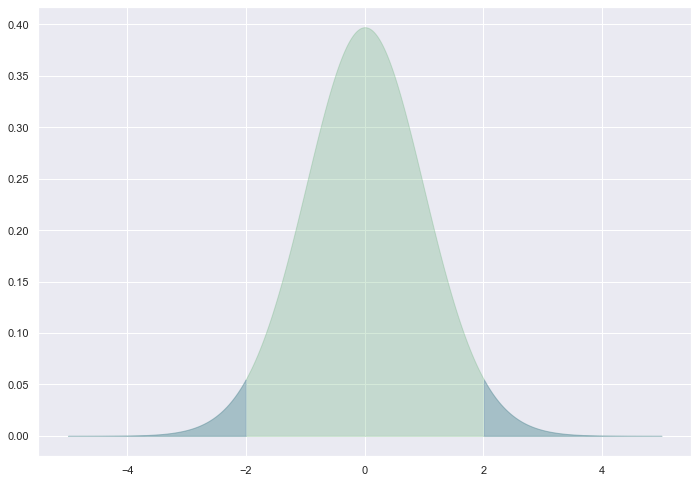

In [109]:
# x values for plotting.
x = np.linspace(-5.0, 5.0, 1000)

# The probability density functions (PDFs) for the t distribution.
# The number of degrees of freedom is (nA + nB - 2).
pdf = stats.t.pdf(x, (nA + nB - 2.0))

# Create a dataframe from x and pdf.
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution.
plt.fill_between(df['x'], df['y'], color='g', alpha=0.25)

# Plot the values more extreme than our |t|.
crit = np.abs(stats.t.ppf(0.975, nA + nB - 2.0))     #ppf
tail1 = df[df['x'] >=  crit]
tail2 = df[df['x'] <= -crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='b', alpha=0.25)

print(crit)

plt.show()

* t-statistics is much lesser than the critical value therefore __we reject__ the null hypothesis. 
* The mean of house prices - those along & those not along the river are __certainly different__. 

***
## 3. Prediction
***

### 3.1 The dataset, input and output view

Peek into the dataset once more...

In [110]:
df3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### The first task is to split the dataset into two random samples (80% and 20%) for 80% training and 20% testing
***

### 3.2 Partition the dataset to Training and Test  - ratio(80:20) (The dataset, input and output view)
- When we do a train test split we both split our features into X-train, X-test as well as our labels into y-train and y-test
- Then we choose a percentage as your test size. We select 20% for test and therefore 80% of the data for training as shown below.
- For repeatability so that the results of the split is the same every time, we set a random_ state variable to to a specific number. This number is just an arbitrary arbitrary choice.



In [111]:
# Features
X = df3[['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']].values

# Label
y  = df3['medv'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)
df3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [112]:
print("=====================================")
print("Size of Test data is:\t\t", len(X_test))
print("Size of Training data is: \t", len(X_train))
print("Total size of dataset is: \t", len(X_test) + len(X_train))
print("=====================================")
# print(inputTrainDataX)

Size of Test data is:		 102
Size of Training data is: 	 404
Total size of dataset is: 	 506


### 3.3 Scale the training and test Data and then Create the model
- We'll go ahead and import MinMaxScalar to transform or normalize the data based off the standard deviation of the data as well as the min and max values.

In [113]:
# Scale the trainData (to range between 0 & 1) so it will work well with sgd [REFz]
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 3.3.1 Whitening...__NOTE: Whitening did not improve the model prediction as such in this work__

In [114]:
# - Convert NDArray to pd.Dataframe
#Xx_train = pd.DataFrame(data=X_train[1:,1:],index=X_train[1:,0],columns=X_train[0,0:])
# Xx_train = pd.DataFrame(data=X_train[1:,1:])
# Xx_train
# Xx_train = pd.DataFrame(X_train[0:])
# # Xx_train.columns = ['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']
# Xx_train

In [115]:
# pca = dec.PCA(n_components=13, whiten=True)
# pca.fit(X_train)
# # X_train_white = pd.DataFrame(pca.transform(X_train), columns=Xx_train.columns)
# X_train_white = pca.transform(X_train)
# X_train_white

In [116]:
# X_test_white = pca.transform(X_test)
# X_test_white

#### 3.3.2 Choosing an optimizer and loss

It is very important to carefully consider the kind of problem at hand in order to select the right combination on optimizers and loss functions. The following are suitable guides.[10]

##### __For a multi-class classification problem__
- model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##### __For a binary classification problem__
- model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

##### __For a mean squared error regression problem__
- model.compile(optimizer='rmsprop', loss='mse'). In reality, __adam__ is more popular choice.

#### The problem at hand in this project falls in the category of 'mean squared error regression'

In [117]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
# Final output node for prediction
model.add(Dense(1,activation='linear'))

### 3.4 Compile and train the model (fitting the data) 

#### 3.4.1 Quick Notes on NEW terms ... [3]
#### Some common definitions that are necessary to know and understand to correctly utilize Keras:

* __Sample:__ one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* __Batch:__ a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* __Epoch:__ an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [118]:
# model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')

In [119]:
# # Train the neural network.
model.fit(X_train, y_train, epochs=300, verbose=1, batch_size=10)

Train on 404 samples
Epoch 1/300
404/404 [==============================] - 1s 2ms/sample - loss: 551.0006
Epoch 2/300
404/404 [==============================] - 0s 203us/sample - loss: 235.2681
Epoch 3/300
404/404 [==============================] - 0s 200us/sample - loss: 108.2288
Epoch 4/300
404/404 [==============================] - 0s 204us/sample - loss: 86.3909
Epoch 5/300
404/404 [==============================] - 0s 208us/sample - loss: 72.2265
Epoch 6/300
404/404 [==============================] - 0s 209us/sample - loss: 63.5124
Epoch 7/300
404/404 [==============================] - 0s 205us/sample - loss: 57.6033
Epoch 8/300
404/404 [==============================] - 0s 202us/sample - loss: 51.7224
Epoch 9/300
404/404 [==============================] - 0s 199us/sample - loss: 47.4479
Epoch 10/300
404/404 [==============================] - 0s 204us/sample - loss: 40.6594
Epoch 11/300
404/404 [==============================] - 0s 214us/sample - loss: 35.0043
Epoch 12/300
404/40

In [120]:
# model.fit(X_train_white,y_train,epochs=250,verbose=1, batch=10)

In [121]:
#model.history.history

In [122]:
loss = model.history.history['loss']

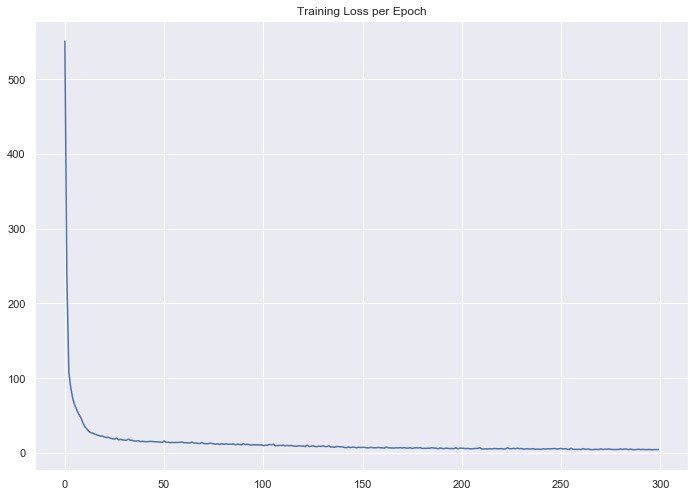

In [123]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### 3.6 Predict and View the output

In [124]:
model.metrics_names

['loss']

#### 3.6.1 Observe the variation between prediction and real values

In [125]:
training_score = model.evaluate(X_train,y_train,verbose=0)

In [126]:
# training_score = model.evaluate(X_train_white,y_train,verbose=0)

In [127]:
test_score = model.evaluate(X_test,y_test,verbose=0)

In [128]:
# test_score = model.evaluate(X_test_white,y_test,verbose=0)

#### 3.6.2 Print(error_in_prediction)

In [129]:
# Mean Square error of this prediction
# np.sqrt(np.sum((error_in_prediction)**2))
print("Training Score = :", training_score.round(4))
print("    Test Score = :", test_score.round(4))

Training Score = : 4.4785
    Test Score = : 13.7767


### 3.7 Tweaking the model and Visually comparing the outputs

In [130]:
train_prediction = model.predict(X_train)
#train_prediction.T

In [131]:
# train_prediction = model.predict(X_train_white) 

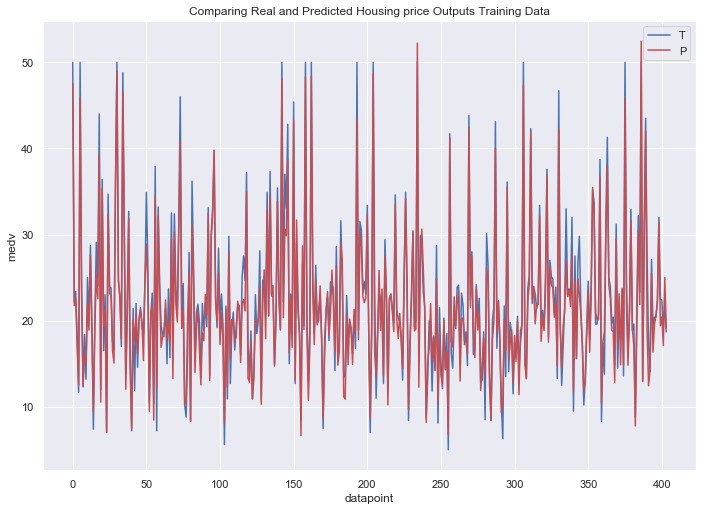

In [132]:
# Create plots of the 2 Outputs for better visual comparison
xT = np.arange(0.0,404.0,1)

# T = Known Training Output(blue), P = Predicted Training Output(red)
plt.plot(xT, y_train, 'b-')
plt.plot(xT, train_prediction, 'r-')
plt.title("Comparing Real and Predicted Housing price Outputs Training Data")
plt.xlabel("datapoint")
plt.ylabel("medv")
plt.legend("TP")    

plt.show()

## 3.8 Time to test the model with the testData...

In [133]:
test_predictions = model.predict(X_test)
#test_predictions.T


In [134]:
# test_predictions = model.predict(X_test_white).round()
# test_predictions.T

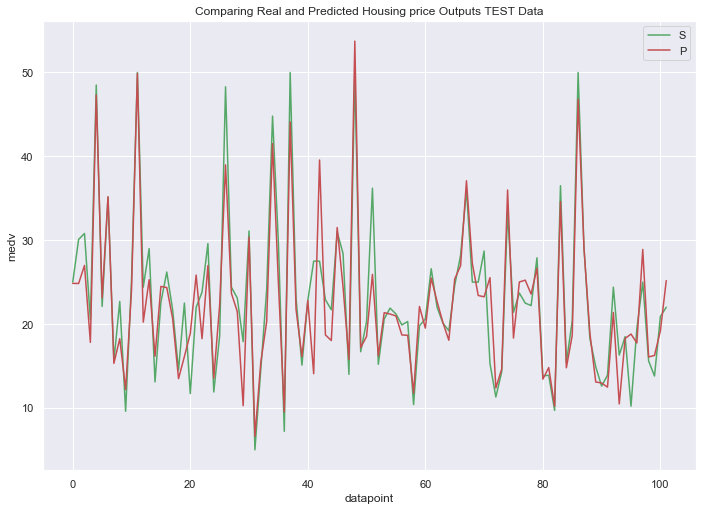

In [135]:
# Create plots of the 2 Outputs for better visual comparison 101
xT = np.arange(0.0,102.0,1)

# S = Known TEST Output(green), P = Predicted TEST Output(red)
plt.plot(xT, y_test, 'g-')
plt.plot(xT, test_predictions, 'r-')
plt.title("Comparing Real and Predicted Housing price Outputs TEST Data")
plt.xlabel("datapoint")
plt.ylabel("medv")
plt.legend("SP") 

plt.show()

In [136]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df.shape

(102, 1)

In [137]:
test_predictions = pd.Series(test_predictions.reshape(102,))

In [138]:
test_predictions

0      24.848164
1      24.839867
2      26.993378
3      17.816158
4      47.302444
         ...    
97     28.900650
98     16.074631
99     16.258595
100    19.178852
101    25.186111
Length: 102, dtype: float32

### 3.8.1 Compute Errors in Test

In [139]:
pred_df         = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test-Y','Y-Predicted']

pred_df

,Test-Y,Y-Predicted
0,25.0,24.848164
1,30.1,24.839867
2,30.8,26.993378
3,20.5,17.816158
4,48.5,47.302444
...,...,...
97,25.0,28.900650
98,15.6,16.074631
99,13.8,16.258595
100,20.9,19.178852


### 3.8.2 Plot Predicted vs. Test values. In theory, __...a 45degrees plot is a perfect achievement.__

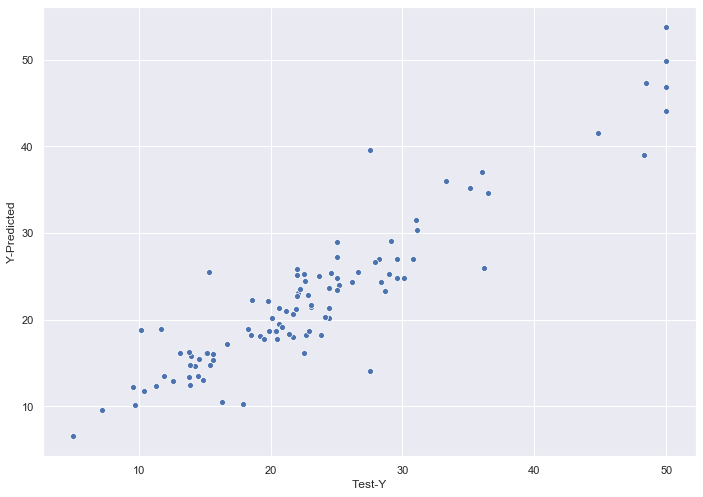

In [140]:
#sns.scatterplot(x='Test-Y',y='Y-Predicted', data=pred_df, palette=cmap, legend='full')
sns.scatterplot(x='Test-Y',y='Y-Predicted', data=pred_df, legend='full')

### 3.8.3 Absoulte Errors

In [141]:
pred_df['Error'] = pred_df['Test-Y'] - pred_df['Y-Predicted']

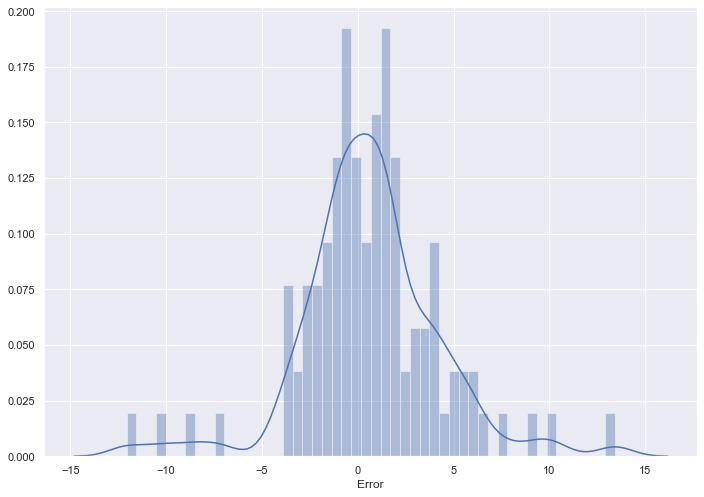

In [142]:
sns.distplot(pred_df['Error'],bins=50)

In [143]:
# Mean absolute Error
mean_absolute_error(pred_df['Test-Y'],pred_df['Y-Predicted']).round(4)

2.6059

In [144]:
# Mean squared Error
mean_squared_error(pred_df['Test-Y'],pred_df['Y-Predicted']).round(4)

13.7767

In [145]:
# Essentially the same thing, difference just due to precision
test_score.round(4)

13.7767

In [146]:
# Root Mean Squared Error
(test_score**0.5).round(4)

3.7117

NOTE: Kaggle account opened & housing.csv dataset downloaded - Today 3rd October, 2019
# References:
#### [1] Python Software Foundation: https://www.python.org/
#### [2] SciPy developers: https://www.scipy.org/
#### [3] Keras: https://keras.io/
#### [4] Project Jupyter: https://jupyter.org/
#### [5] Housing Values in Suburbs of Boston: https://www.kaggle.com/c/boston-housing.
#### [6] Online Resources: https://www.weirdgeek.com/2018/12/linear-regression-to-boston-housing-dataset/ 
#### [7] Wiki: https://en.wikipedia.org/wiki/Multicollinearity
#### [8] Scikit Learn: https://scikit-learn.org/stable/](https://scikit-learn.org/stable/
#### [9] Inferential Statistics: https://www.statisticshowto.datasciencecentral.com/inferential-statistics/
#### [10] Choosing Optimizers: https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/

## END...